<a href="https://colab.research.google.com/github/vvrgit/AI/blob/main/Decision_Tree_Regression_AI_Track_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mount Google Drive

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load Data

In [22]:
dataset = pd.read_csv('/content/drive/MyDrive/AI Data/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values
dataset.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


#Data Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

#Model Training

In [24]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#Model Prediction

In [25]:
y_pred = regressor.predict(X_test.reshape(-1,1))
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,603.232942,559.135869
1,428.854356,390.879119
2,702.901717,651.861536
3,496.011295,471.701557
4,537.113833,578.360435
5,594.651009,658.593732
6,448.930443,456.524341
7,296.906532,384.699415
8,569.618756,565.875000
9,594.311675,572.672047


#Predicted Data Visulization

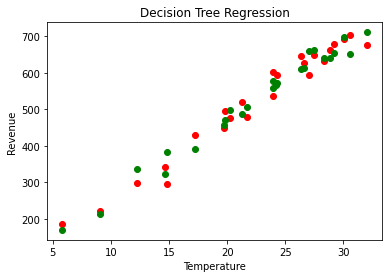

In [26]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Decision Tree Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

# Error Metrics

In [27]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Testing Accuracies
rmse = math.sqrt(mean_squared_error(y_test, y_pred)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_test, y_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred)
print('Mean absolute error', mae)

Root mean square error 34.245824185243414
Mean square error 1172.7764741266028
Mean absolute error 28.407173752000002


#Save Model

In [28]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(regressor, open(filename, 'wb'))

# Deployment

In [29]:
user_ip=input('enter temperature')
temp=np.array(float(user_ip))
temp=temp.reshape(-1,1)

model = pickle.load(open('model.pkl', 'rb'))
prediction = model.predict(temperature)
Revenue = prediction[0]
print('Revenue of Ice Cream Parl',Revenue)

enter temperature50
Revenue of Ice Cream Parl 1000.0
